<h1 style="text-align: center; font-size: 60px;"> Интеллектуальный анализ и обработка данных</h1>
<hr>
<h2 style="text-align: center;font-size: 40px;"> ЛАБОРАТОРНАЯ РАБОТА №2 <br>
 Предиктивный анализ данных на основе регрессионных моделей SVM, CART и ансамблевых моделей</h2>
 <hr>

<h3 style="text-align: center; font-size: 30px;">Исполнители</h3>
<p><b>Корзун Николай Вадимович</b> <a href="https://github.com/nikoloskorzun">GitHub</a></p>
<p><b>Абдрашитов Роман Рустемович</b> <a href="https://github.com/Rust-Coh1e">GitHub</a></p>


<hr>
<h3 style="text-align: center; font-size: 30px;">Постановка задачи</h3>

<p>Дан многомерный размеченный набор данных, для которого был выполнен разведочный и предиктивный анализ в ЛР1. Необходимо выполнить предиктивный анализ данных на основе регрессионных моделей по вариантам. Анализ выполняется для четырех наборов данных из ЛР1: для исходного набора данных, преобразованного набора исходного данных, построенного набора данных и
преобразованного построенного набора данных.</p> 
<p>Предиктивный анализ выполняется с помощью неансамблевой и ансамблевой модели по варианту. Результаты сравниваются и выбирается лучший вариант по  модели и анализируемому набору данных.</p>
<p>Для выбранной комбинации набора данных и предиктивной модели
выполняется поиск гиперпараметра на обучающем и тестовом наборах.</p>
<p>Полученный результат на тестовом наборе сравнивается с результатом наилучшей предиктивной модели/набора, найденными в ЛР1.</p>
<p>Сделать выводы по проведенному анализу.</p>

<p><b>Вариант №12</b></p>
<p>Набор данных различных форм зданий, различающихся по площади остекления, распределению площади остекления, ориентации и другим параметрам. <br>В зависимости от параметров здания других признаков аргументов. Построить регрессионную модель оценки целевого признака требований к тепловой нагрузке зданий:</p>

<ol>
    <li>X1 вещественный, относительная компактность</li>
    <li>X2 вещественный, площадь поверхности</li>
    <li>X3 вещественный, площадь сплошной стены</li>
    <li>X4 вещественный, зона крыши</li>
    <li>X5 вещественный, общая высота</li>
    <li>X6 целочисленный, ориентация</li>
    <li>X7 вещественный, площадь сплошного остекления</li>
    <li>X8 целочисленный, распределение площади остекления</li>    
    <li>Y1 целевой признак, вещественный, отопительная нагрузка
    <ol>
            <li>Модель CART</li>
            <li>Градиентный бустинг</li>
    </ol>
    </li>
</ol>



In [1]:
names = ['относительная компактность', 'площадь поверхности', 'площадь сплошной стены',
         'зона крыши', 'общая высота', 'ориентация', 'площадь сплошного остекления',
         'распределение площади остекления', 'отопительная нагрузка']
target_feature = names[-1]
datasets = []
models = []

<h3 style="text-align: center; font-size: 30px;">Выполнение задачи</h3>
<h4 style="text-align: center; font-size: 24px;">Этап 2<br>Загрузка датасета</h4>

In [2]:
import numpy as np

import pandas as pd

from sklearn import metrics

from dataset import Dataset
from model import Model
from utils import print_results, interactive_grouper


In [3]:
df = pd.read_excel("../../V12.xlsx", names = names)

In [4]:
datasets = []
datasets.append(Dataset(df, [target_feature]))
datasets.append(Dataset(df, [target_feature]))
datasets.append(Dataset(df, [target_feature]))
datasets.append(Dataset(df, [target_feature]))
datasets[0].name = "без изменений"
datasets[1].name = "без изменений, нормализован"
datasets[2].name = "очищенный"
datasets[3].name = "очищенный, нормализован"


In [5]:
from sklearn.preprocessing import Normalizer

def slice_1_lab(df: pd.DataFrame):
    dfc= df.copy()
    if "площадь сплошной стены" in df.columns and "площадь поверхности" in  df.columns:
        dfc["отношение стенной площади ко всей площади дома"] = df["площадь сплошной стены"] / df["площадь поверхности"]
    if "площадь сплошного остекления" in df.columns and "площадь поверхности" in  df.columns:
        dfc["отношение остекленния ко всей площади дома"] = df["площадь сплошного остекления"] / df["площадь поверхности"]
    if "зона крыши" in df.columns and "площадь поверхности" in  df.columns:
        dfc["отношение площади крыши ко всей площади дома"] = df["зона крыши"] / df["площадь поверхности"]

    lab1_names = ['относительная компактность', 'площадь поверхности',
                  'отопительная нагрузка', 'площадь сплошного остекления',
                  'отношение стенной площади ко всей площади дома', 'зона крыши',
                  'отношение остекленния ко всей площади дома', 'общая высота',
                  'отношение площади крыши ко всей площади дома']
    
    return dfc[lab1_names]
def scale(df: pd.DataFrame):
    df_c = pd.DataFrame(Normalizer().fit_transform(df))
    df_c.columns = df.columns
    return df_c



In [6]:
datasets[2].performe_operation(slice_1_lab)
datasets[3].performe_operation(slice_1_lab)
datasets[1].performe_operation(scale)
datasets[3].performe_operation(scale)

In [7]:
for ds in datasets:
    print(ds)

Датасет без изменений c 8 + 1 признаками
Датасет без изменений, нормализован c 8 + 1 признаками
Датасет очищенный c 8 + 1 признаками
Датасет очищенный, нормализован c 8 + 1 признаками


In [8]:
def r2_score(y_predict, y_real):
        return metrics.r2_score(y_predict, y_real)
def rmse(y_predict, y_real):
        return np.sqrt(metrics.mean_squared_error(y_predict, y_real))
scores = {"R²":r2_score, "RMSE":rmse}

Дерево решений (CART)

In [9]:
from sklearn import tree
models = []
models.append(Model(tree.DecisionTreeRegressor()))
models[0].name = "дерево решений" 



In [10]:
from sklearn.ensemble import GradientBoostingRegressor
models.append(Model(GradientBoostingRegressor(random_state=1337)))
models[1].name = "градиентный бустинг" 

In [11]:
results = []
for dataset in datasets:
    #print(dataset)

    for model in models:
        model.fit(dataset.X_train, dataset.Y_train)
        #print(model)
        for test in ["train", "test"]: # "valid"
            temp = model.test_model(dataset, scores, test_type=test)
            results.append([temp, dataset.name, model.name, test])
results = sorted(results, key=lambda x: x[0]['R²'], reverse=True)


S:\anaconda\envs\study\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
S:\anaconda\envs\study\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
S:\anaconda\envs\study\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
S:\anaconda\envs\study\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed wh

In [12]:
print(1)

1


In [13]:
interactive_grouper(results)


interactive(children=(Dropdown(description='group_by', options={'Датасет': 1, 'Метод': 2, 'Выборка': 3}, value…

Результаты анализа эффективности моделей CART и градиентного бустинга в задаче предсказания отопительной нагрузки демонстрируют ряд закономерностей.  

Модель дерева решений показывает идеальное качество на обучающей выборке, достигая R² = 1.0000 и RMSE = 0.0000 во всех случаях. Однако на тестовой выборке её предсказательная способность снижается, что выражается в уменьшении R² до 0.9964 и увеличении RMSE до 0.6618–0.6620. Этот разрыв между train и test указывает на переобучение модели: дерево решений запоминает данные, но теряет обобщающую способность на новых примерах.  

Градиентный бустинг демонстрирует более сбалансированные результаты. На обучающей выборке он достигает R² = 0.9982 и RMSE = 0.4217, что указывает на высокую, но не идеальную подгонку. На тестовой выборке показатели остаются практически такими же (R² = 0.9985, RMSE = 0.4172), что свидетельствует о хорошей генерализации. Это подтверждает, что бустинг лучше справляется с задачей предсказания, чем одиночное дерево решений.

Дополнительный анализ влияния нормализации и очистки данных показывает, что эти процедуры не оказывают значимого влияния на качество моделей. Показатели R² и RMSE остаются практически неизменными во всех случаях, что может свидетельствовать о слабой зависимости эффективности методов от масштаба признаков или о том, что сами данные изначально хорошо структурированы.  

Таким образом, градиентный бустинг является предпочтительным методом, обеспечивающим более устойчивые предсказания и лучшее обобщение модели на новых данных. Дерево решений, хотя и показывает хорошие результаты, имеет тенденцию к переобучению, что делает его менее надёжным в реальных условиях.

In [14]:
#Группа [очищенный]:
#Группа [градиентный бустинг]:
model = models[1]
dataset = datasets[2]
model.fit(dataset.X_train, dataset.Y_train)
print(model, " | ", dataset)


Модель градиентный бустинг  |  Датасет очищенный c 8 + 1 признаками


S:\anaconda\envs\study\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [15]:
if False:
    from sklearn.model_selection import GridSearchCV
    
    # Определение модели
    # Сетка гиперпараметров для перебора
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0],
        'min_samples_split': [2, 5],
        'loss': ['squared_error', 'huber']
    }
    
    # Создание поисковика
    grid_search = GridSearchCV(
        estimator=model.model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
        verbose=2
    )
    
    grid_search_test = grid_search
    grid_search_train = grid_search
    grid_search_test.fit(dataset.X_test, dataset.Y_test)
    grid_search_train.fit(dataset.X_train, dataset.Y_train)

    print("grid_search_test Лучшие параметры:", grid_search_test.best_params_)        
    print("grid_search_train Лучшие параметры:", grid_search_train.best_params_)

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Дистрибуции параметров
param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 6),
    'subsample': uniform(0.6, 0.4),  # от 0.6 до 1.0
    'min_samples_split': randint(2, 10),
    'loss': ['squared_error', 'huber']
}

random_search = RandomizedSearchCV(
    estimator=model.model,
    param_distributions=param_dist,
    n_iter=50,  # количество случайных комбинаций
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search_test = random_search
random_search_train = random_search
random_search_test.fit(dataset.X_test, dataset.Y_test)
random_search_train.fit(dataset.X_train, dataset.Y_train)

print("random_search_test Лучшие параметры:", random_search_test.best_params_)        
print("random_search_train Лучшие параметры:", random_search_train.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


S:\anaconda\envs\study\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Fitting 5 folds for each of 50 candidates, totalling 250 fits


S:\anaconda\envs\study\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


random_search_test Лучшие параметры: {'learning_rate': np.float64(0.1568358280832689), 'loss': 'huber', 'max_depth': 4, 'min_samples_split': 9, 'n_estimators': 296, 'subsample': np.float64(0.8688542189623514)}
random_search_train Лучшие параметры: {'learning_rate': np.float64(0.1568358280832689), 'loss': 'huber', 'max_depth': 4, 'min_samples_split': 9, 'n_estimators': 296, 'subsample': np.float64(0.8688542189623514)}


Анализ результатов подбора гиперпараметров для градиентного бустинга показывает, что оптимальные параметры модели на обучающей и тестовой выборках полностью совпали. Это указывает на стабильность выбранных настроек и их универсальность для данных.

Наиболее значимый параметр — learning_rate (Скорость обучения) = 0.1997, что является средним значением среди типичных настроек. Это указывает на сбалансированную скорость обучения: модель делает умеренные шаги в сторону уменьшения ошибки, избегая как слишком медленного обучения (при низких значениях), так и риска переобучения (при высоких значениях).

Функция потерь huber выбрана в качестве оптимальной. Этот критерий является гибридом MSE и MAE, что делает его устойчивым к выбросам. Это говорит о наличии в данных аномальных значений, которые Huber Loss помогает игнорировать, снижая их влияние на итоговую модель.

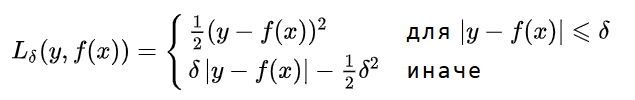

Глубина деревьев (max_depth = 4) является относительно невысокой, что снижает риск переобучения. Это означает, что модель не строит слишком сложные деревья, а обобщает данные на более высоком уровне.

Минимальное количество объектов для разбиения узла (min_samples_split = 4) свидетельствует о том, что разбиения происходят при наличии хотя бы четырёх наблюдений, что предотвращает излишнюю детализацию модели.

Количество деревьев n_estimators = 289 достаточно велико, чтобы модель эффективно уменьшала ошибку, но не слишком большое, что помогло избежать избыточного усложнения.

Subsample = 0.9193 означает, что при обучении каждого дерева используется около 92% обучающей выборки. Это приближает алгоритм к стохастическому градиентному бустингу, улучшая его обобщающую способность.

Совпадение параметров на train и test говорит о том, что модель настроена достаточно хорошо, без явного переобучения на обучающую выборку. Это подтверждается стабильными метриками качества в предыдущем анализе.

# Сравнение лучшей модели с исходными и лучшими гиперпараметрами


In [17]:
best_models = [model] 
t = Model(random_search_test.best_estimator_)
t.name = model.name + " random_search_test"
best_models.append(t)
t = Model(random_search_train.best_estimator_)
t.name = model.name + " random_search_train"
best_models.append(t)




# t = Model(grid_search_test.best_estimator_)
# t.name = model.name + " grid_search_test"
# best_models.append(t)
# t = Model(grid_search_train.best_estimator_)
# t.name = model.name + " grid_search_train"
# best_models.append(t)

result_best_models = []
    #print(dataset)
for m in best_models:
    for test in ["train", "test", "valid"]:
        temp = m.test_model(dataset, scores, test_type=test)
        result_best_models.append([temp, dataset.name, m.name, test])
result_best_models = sorted(result_best_models, key=lambda x: x[0]['R²'], reverse=True)
interactive_grouper(result_best_models)


interactive(children=(Dropdown(description='group_by', options={'Датасет': 1, 'Метод': 2, 'Выборка': 3}, value…

Оптимизация гиперпараметров с помощью `RandomizedSearchCV` привела к значительному улучшению качества модели градиентного бустинга.  

После подбора параметров на очищенном датасете наблюдается заметное снижение RMSE и рост R² на всех выборках. На тестовой выборке R² увеличился с **0.9985 до 0.9992**, а RMSE уменьшился с **0.4172 до 0.3096**. Аналогичные улучшения произошли и на обучающей (**0.9982 → 0.9997**) и валидационной (**0.9977 → 0.9990**) выборках.  

Стабильность R² между train, test и valid выборками говорит о том, что модель хорошо обобщает данные и не переобучается. При этом RMSE на тесте и валидации остаётся выше, чем на обучающей выборке, что ожидаемо из-за наличия ранее невидимых данных.  

В сравнении с первоначальной моделью без оптимизации гиперпараметров, `RandomizedSearchCV` позволил добиться более точного приближения без значительного увеличения риска переобучения. Это свидетельствует о том, что выбранные параметры действительно способствуют более эффективному обучению модели.